In [ ]:
!pip install tensorflow-addons
!pip install keras-tuner
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Tensorflow
import tensorflow as tf
from keras.utils import load_img, img_to_array, to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras import Sequential



from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras import Sequential
from keras.callbacks import EarlyStopping

#Tensorflow-Addons
import tensorflow_addons as tfa

#Keras-Tuner
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 16.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 12.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
#mounting the drive for data access on drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# import Dataset
train_df = pd.read_csv('/content/drive/MyDrive/Proje/Recognition/Data/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Proje/Recognition/Data/Test.csv')
aug_df = pd.read_csv('/content/drive/MyDrive/Proje/Recognition/Data/Aug.csv')
augtest_df = pd.read_csv('/content/drive/MyDrive/Proje/Recognition/Data/AugTest.csv')

augm_df = pd.read_csv('/content/drive/MyDrive/Proje/Recognition/Data/Aug_MotionBlur.csv')
augmtest_df = pd.read_csv('/content/drive/MyDrive/Proje/Recognition/Data/AugTest_MotionBlur.csv')

In [ ]:
test_df.head()

In [ ]:
train_df.info(), print('\n'), test_df.info()

In [ ]:
# Creating labels
labels = {0:'Speed limit(20km/h)',
          1:'Speed limit(30km/h)',
          2:'Speed limit(50km/h)',
          3:'Speed limit(60km/h)',
          4:'Speed limit(70km/h)',
          5:'Speed limit(80km/h)',
          6:'End of speed limit(80km/h)',
          7:'Speed limit(100km/h)',
          8:'Speed limit(120km/h)',
          9:'No passing',
          10:'No passing for vehicles over 3.5 metric tons',
          11:'Right-of-way at the next intersection',
          12:'Priority road',
          13:'Yield',
          14:'Stop',
          15:'No vehicles',
          16:'Vehicles over 3.5 metric tons prohibted',
          17:'No entry',
          18:'General caution',
          19:'Dangerous curve to the left',
          20:'Dangerous curve to the right',
          21:'Double curve',
          22:'Bumpy road',
          23:'Slippery road',
          24:'Road narrows on the right',
          25:'Road work',
          26:'Traffic signals',
          27:'Pedestrians',
          28:'Children crossing',
          29:'Bicycles crossing',
          30:'Beware of ice/snow',
          31:'Wild animals crossing',
          32:'End of all speed and passing limits',
          33:'Turn right ahead',
          34:'Turn left ahead',
          35:'Ahead only',
          36:'Go straight or right',
          37:'Go straight or left',
          38:'Keep right',
          39:'Keep left',
          40:'Roundabout mandatory',
          41:'End of no passing',
          42:'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
labels.values()

In [ ]:
!unzip /content/drive/MyDrive/Proje/Recognition/Data/gtsrb.zip

Streaming output truncated to the last 5000 lines.
 extracting: Train/5/00005_00053_00014.png  
 extracting: Train/5/00005_00053_00015.png  
 extracting: Train/5/00005_00053_00016.png  
 extracting: Train/5/00005_00053_00017.png  
 extracting: Train/5/00005_00053_00018.png  
 extracting: Train/5/00005_00053_00019.png  
 extracting: Train/5/00005_00053_00020.png  
 extracting: Train/5/00005_00053_00021.png  
 extracting: Train/5/00005_00053_00022.png  
 extracting: Train/5/00005_00053_00023.png  
 extracting: Train/5/00005_00053_00024.png  
 extracting: Train/5/00005_00053_00025.png  
 extracting: Train/5/00005_00053_00026.png  
 extracting: Train/5/00005_00053_00027.png  
 extracting: Train/5/00005_00053_00028.png  
 extracting: Train/5/00005_00053_00029.png  
 extracting: Train/5/00005_00054_00000.png  
 extracting: Train/5/00005_00054_00001.png  
 extracting: Train/5/00005_00054_00002.png  
 extracting: Train/5/00005_00054_00003.png  
 extracting: Train/5/00005_00054_00004.png  
 ext

In [ ]:
!unzip /content/drive/MyDrive/Proje/Recognition/Data/Test.zip

Streaming output truncated to the last 5000 lines.
 extracting: Test/07631.png          
 extracting: Test/07632.png          
 extracting: Test/07633.png          
 extracting: Test/07634.png          
 extracting: Test/07635.png          
  inflating: Test/07636.png          
 extracting: Test/07637.png          
  inflating: Test/07638.png          
  inflating: Test/07639.png          
 extracting: Test/07640.png          
 extracting: Test/07641.png          
 extracting: Test/07642.png          
 extracting: Test/07643.png          
 extracting: Test/07644.png          
  inflating: Test/07645.png          
 extracting: Test/07646.png          
 extracting: Test/07647.png          
 extracting: Test/07648.png          
  inflating: Test/07649.png          
 extracting: Test/07650.png          
 extracting: Test/07651.png          
 extracting: Test/07652.png          
 extracting: Test/07653.png          
 extracting: Test/07654.png          
  inflating: Test/07655.png          

In [ ]:
!unzip /content/drive/MyDrive/Proje/Recognition/Data/Aug.zip

Streaming output truncated to the last 5000 lines.
 extracting: Aug/9/1199_fog.png      
 extracting: Aug/9/1199_fog2.png     
 extracting: Aug/9/1199_rain.png     
 extracting: Aug/9/1199_snow.png     
  inflating: Aug/9/119_fog.png       
 extracting: Aug/9/119_fog2.png      
 extracting: Aug/9/119_rain.png      
 extracting: Aug/9/119_snow.png      
 extracting: Aug/9/11_fog.png        
 extracting: Aug/9/11_fog2.png       
 extracting: Aug/9/11_rain.png       
 extracting: Aug/9/11_snow.png       
 extracting: Aug/9/1200_fog.png      
 extracting: Aug/9/1200_fog2.png     
 extracting: Aug/9/1200_rain.png     
 extracting: Aug/9/1200_snow.png     
 extracting: Aug/9/1201_fog.png      
 extracting: Aug/9/1201_fog2.png     
 extracting: Aug/9/1201_rain.png     
 extracting: Aug/9/1201_snow.png     
 extracting: Aug/9/1202_fog.png      
 extracting: Aug/9/1202_fog2.png     
 extracting: Aug/9/1202_rain.png     
 extracting: Aug/9/1202_snow.png     
 extracting: Aug/9/1203_fog.png      

In [ ]:
!unzip /content/drive/MyDrive/Proje/Recognition/Data/TestAug.zip

Streaming output truncated to the last 5000 lines.
  inflating: TestAug/8877_fog.png    
  inflating: TestAug/8877_fog2.png   
  inflating: TestAug/8877_rain.png   
  inflating: TestAug/8877_snow.png   
 extracting: TestAug/8878_fog.png    
 extracting: TestAug/8878_fog2.png   
 extracting: TestAug/8878_rain.png   
 extracting: TestAug/8878_snow.png   
 extracting: TestAug/8879_fog.png    
 extracting: TestAug/8879_fog2.png   
 extracting: TestAug/8879_rain.png   
 extracting: TestAug/8879_snow.png   
  inflating: TestAug/887_fog.png     
  inflating: TestAug/887_fog2.png    
  inflating: TestAug/887_rain.png    
 extracting: TestAug/887_snow.png    
  inflating: TestAug/8880_fog.png    
 extracting: TestAug/8880_fog2.png   
 extracting: TestAug/8880_rain.png   
 extracting: TestAug/8880_snow.png   
 extracting: TestAug/8881_fog.png    
 extracting: TestAug/8881_fog2.png   
 extracting: TestAug/8881_rain.png   
 extracting: TestAug/8881_snow.png   
 extracting: TestAug/8882_fog.png    

In [ ]:
!unzip /content/drive/MyDrive/Proje/Recognition/Data/Aug_MotionBlur.zip

Streaming output truncated to the last 5000 lines.
  inflating: augmented_train/9/1196_horizontal_10.jpg  
  inflating: augmented_train/9/1196_horizontal_5.jpg  
  inflating: augmented_train/9/1196_vertical_10.jpg  
  inflating: augmented_train/9/1196_vertical_5.jpg  
  inflating: augmented_train/9/1197_horizontal_10.jpg  
  inflating: augmented_train/9/1197_horizontal_5.jpg  
  inflating: augmented_train/9/1197_vertical_10.jpg  
  inflating: augmented_train/9/1197_vertical_5.jpg  
  inflating: augmented_train/9/1198_horizontal_10.jpg  
  inflating: augmented_train/9/1198_horizontal_5.jpg  
  inflating: augmented_train/9/1198_vertical_10.jpg  
  inflating: augmented_train/9/1198_vertical_5.jpg  
  inflating: augmented_train/9/1199_horizontal_10.jpg  
  inflating: augmented_train/9/1199_horizontal_5.jpg  
  inflating: augmented_train/9/1199_vertical_10.jpg  
  inflating: augmented_train/9/1199_vertical_5.jpg  
  inflating: augmented_train/9/12_horizontal_10.jpg  
  inflating: augmented_

In [ ]:
!unzip /content/drive/MyDrive/Proje/Recognition/Data/TestAug_MotionBlur.zip

Streaming output truncated to the last 5000 lines.
  inflating: augmented_test/8874_horizontal_10.png  
 extracting: augmented_test/8874_horizontal_5.png  
 extracting: augmented_test/8874_vertical_10.png  
 extracting: augmented_test/8874_vertical_5.png  
 extracting: augmented_test/8875_horizontal_10.png  
 extracting: augmented_test/8875_horizontal_5.png  
 extracting: augmented_test/8875_vertical_10.png  
 extracting: augmented_test/8875_vertical_5.png  
 extracting: augmented_test/8876_horizontal_10.png  
 extracting: augmented_test/8876_horizontal_5.png  
 extracting: augmented_test/8876_vertical_10.png  
 extracting: augmented_test/8876_vertical_5.png  
  inflating: augmented_test/8877_horizontal_10.png  
  inflating: augmented_test/8877_horizontal_5.png  
  inflating: augmented_test/8877_vertical_10.png  
  inflating: augmented_test/8877_vertical_5.png  
  inflating: augmented_test/8878_horizontal_10.png  
 extracting: augmented_test/8878_horizontal_5.png  
  inflating: augment

In [ ]:
#import shutil
#shutil.copytree('/content/Aug', '/content/drive/MyDrive/Proje/Aug')
#shutil.copytree('/content/Test', '/content/drive/MyDrive/Proje/Test')
#shutil.copytree('/content/Train', '/content/drive/MyDrive/Proje/Train')
#shutil.copytree('/content/TestAug', '/content/drive/MyDrive/Proje/TestAug')

In [ ]:
# getting only the Path and ClassId
train_df = train_df[['ClassId', 'Path']]
test_df = test_df[['ClassId', 'Path']]
aug_df = aug_df[['ClassId', 'Path']]
augtest_df = augtest_df[['ClassId', 'Path']]

augm_df = augm_df[['ClassId', 'Path']]
augmtest_df = augmtest_df[['ClassId', 'Path']]

In [ ]:
train_df['Path'].head() #/content/drive/MyDrive/Proje/Aug/0/0_fog.png

In [ ]:
# add the complete path
#train_df['Path'] = train_df['Path'].apply(lambda x: '/' + x)
#test_df['Path'] = test_df['Path'].apply(lambda x: '/' + x)

In [ ]:
# Example of the new path in the data
print(f'The new path of the first image in "train_df" : {train_df.Path[0]}')
print(f'The new path of the first image in "test_df" : {test_df.Path[0]}')
print(f'The new path of the first image in "aug_df" : {aug_df.Path[0]}')
print(f'The new path of the first image in "augtest_df" : {augtest_df.Path[0]}')

In [ ]:
# create a random number
random_nbr = random.randint(1, len(train_df)) # or randint(1, train_df.shape[0]))

# read the images randomly and plot'm
img = plt.imread(train_df.Path[random_nbr]) # read the image from the path
print(f'image shape : {img.shape}') # print the shape of the image
fig, ax = plt.subplots(figsize=(8,4))

ax.imshow(img)
ax.set_title(labels[train_df.ClassId[random_nbr]])
ax.axis('off')
plt.show()

In [ ]:
test_df = pd.concat([test_df, augtest_df, augmtest_df])
train_df = pd.concat([train_df, aug_df, augm_df])

In [ ]:
# Split the data into training and validation sets
train_data = train_df.sample(frac=0.8, random_state=0)
valid_data = train_df.drop(train_df.index)


# Preprocess the data
IMG_SIZE = 32
NUM_CLASSES = len(labels)

def preprocess_data(df):
    X = []
    y = []
    for index, row in df.iterrows():
        img = load_img(row.Path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(to_categorical(row.ClassId, num_classes=NUM_CLASSES))
    return np.array(X), np.array(y)

X_train, y_train = preprocess_data(train_data)
X_valid, y_valid = preprocess_data(valid_data)
X_test, y_test = preprocess_data(test_df)

In [ ]:
print(f'The shape of X_train : {X_train.shape}')
print(f'The shape of X_test : {y_train.shape}')

In [ ]:
#BUKET CUSTOM MODEL 3
# Decide the model architecture with keras tuner

def build_model(hp):

  model=Sequential()

  model.add(Input((32,32,3)))

  model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,activation="relu"))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=64,kernel_size=(3,3),strides=2,activation="relu"))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(3,3),strides=2))

  model.add(Conv2D(filters=128,kernel_size=(3,3),strides=2,activation="relu"))
  model.add(BatchNormalization())

  model.add(Dropout(0.25))

  model.add(Flatten())


  for i in range(hp.Int("num_layers",1,4)):
    model.add(Dense(hp.Int("dense_layer_units",32,512,32),activation="relu"))
    if hp.Boolean("dropout"):
      model.add(Dropout(rate=hp.Choice("dropout_ratio",[0.25,0.5])))

  model.add(Dense(43,activation="softmax"))

  learning_rate=hp.Choice("lr_rate",[1e-4,1e-2])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss="categorical_crossentropy",metrics=['accuracy',tfa.metrics.F1Score(num_classes = 43)])

  return model

In [ ]:
#BUKET CUSTOM MODEL 3
# Define the callback
early_stopping=EarlyStopping(monitor="val_loss",patience=5,mode="min")

In [ ]:
#BUKET CUSTOM MODEL 3
import keras_tuner
#Define the tuner
tuner=RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    directory="dirr2"
)

In [ ]:
#BUKET CUSTOM MODEL 3
#Fit the tuner
tuner.search(X_train,
             y_train,
             epochs=3,
             validation_split=0.2,
             callbacks=[early_stopping]
             )

In [ ]:
#BUKET CUSTOM MODEL 3
#Print the selection choices
print(tuner.get_best_hyperparameters()[0].values)

In [ ]:
#BUKET CUSTOM MODEL 3
#Save the best model
tuned_model=tuner.get_best_models()[0]

In [ ]:
#BUKET CUSTOM MODEL 3
# Fit the tuned model
history =tuned_model.fit(X_train,
                    y_train,
                    epochs=10,validation_split=0.2,verbose=1)

In [ ]:
#BUKET CUSTOM MODEL 3
(loss,accuracy,f1_score)=tuned_model.evaluate(X_test, y_test)

In [ ]:
#BUKET CUSTOM MODEL 2
model_buket = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),

    Dense(43, activation='softmax')
])

model_buket.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy',tfa.metrics.F1Score(num_classes = 43)])

In [ ]:
#BUKET CUSTOM MODEL 2
history = model_buket.fit(X_train,
                    y_train,
                    epochs=30,validation_split=0.2,verbose=1)

In [ ]:
#BUKET CUSTOM MODEL 2 - 30 epochs
model_buket.evaluate(X_test, y_test)

In [ ]:
#BUKET CUSTOM MODEL 2
#visualising the loss change during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.show()

In [ ]:
#BUKET CUSTOM MODEL 2
#visualising f1_score change during training
plt.plot(np.mean(history.history["f1_score"], axis=1), label ="train f1 score")
plt.plot(np.mean(history.history["val_f1_score"], axis=1), label = "validation f1 score")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("f1 score")
plt.show()

In [ ]:
#BARAN CUSTOM MODEL #2

# Define the model architecture
model_baran = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model_baran.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=NUM_CLASSES)])

In [ ]:
#BARAN CUSTOM MODEL #2
history = model_baran.fit(X_train,
                    y_train,
                    epochs=30,validation_split=0.2,verbose=1)

In [ ]:
##BARAN CUSTOM MODEL #2 - 10 epoch
model_baran.evaluate(X_test, y_test)

In [ ]:
#BARAN CUSTOM MODEL #2
#visualising f1_score change during training
plt.plot(np.mean(history.history["f1_score"], axis=1), label ="train f1 score")
plt.plot(np.mean(history.history["val_f1_score"], axis=1), label = "validation f1 score")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("f1 score")
plt.show()

In [ ]:
#BARAN CUSTOM MODEL #2
#visualising the loss change during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.show()

In [ ]:
#BARAN CUSTOM MODEL #1
model_baran3 = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),

    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),

    Dense(43, activation='softmax')
])

model_baran3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=43)])

In [ ]:
#BARAN CUSTOM MODEL #1
history = model_baran3.fit(X_train,
                    y_train,
                    epochs=30,validation_split=0.2,verbose=1)

In [ ]:
#BARAN CUSTOM MODEL #1 - 30 epoch
model_baran3.evaluate(X_test, y_test)

In [ ]:
#BARAN CUSTOM MODEL #1
#visualising the loss change during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.show()

In [ ]:
#BARAN CUSTOM MODEL #1
#visualising f1_score change during training
plt.plot(np.mean(history.history["f1_score"], axis=1), label ="train f1 score")
plt.plot(np.mean(history.history["val_f1_score"], axis=1), label = "validation f1 score")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("f1 score")
plt.show()

In [ ]:
#BARAN CUSTOM MODEL #1
model_baran2.summary()

In [ ]:
#baran
model_baran2.evaluate(X_test, y_test)

In [ ]:
#TINYVGG-CUSTOM ---- 2 tane CONV2D layer ve 1 tane MaxPooling2D silinmiş hali
tinyvgg_modelv2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
# Compile the model
tinyvgg_modelv2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=NUM_CLASSES)])

In [ ]:
#for tinyvgg
history = tinyvgg_modelv2.fit(X_train,
                    y_train,
                    epochs=10,validation_split=0.2,verbose=1)

In [ ]:
#for tinyvgg
tinyvgg_modelv2.evaluate(X_test, y_test)

In [ ]:
#ALTERNATE MODEL VGG16
# Define the VGG16 model architecture and adjust last layers
IMG_SIZE = 32
num_classes = 43
vgg16_model = Sequential([

  VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3)),
  BatchNormalization(),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(43, activation='softmax')

])

vgg16_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy',tfa.metrics.F1Score(num_classes = 43)])

In [ ]:
#for vgg16
history = vgg16_model.fit(X_train,
                    y_train,
                    epochs=2,validation_split=0.2,verbose=1)

In [ ]:
#for vgg16
vgg16_model.evaluate(X_test, y_test)

In [ ]:
#ALTERNATE MODEL VGG19
# Define the VGG19 model architecture and adjust last layers

vgg19_model = Sequential([

  VGG19(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3)),
  BatchNormalization(),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(43, activation='softmax')

])

vgg19_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy',tfa.metrics.F1Score(num_classes = 43)])

In [ ]:
#for vgg19
history = vgg19_model.fit(X_train,
                    y_train,
                    epochs=7,validation_split=0.2,verbose=1)

In [ ]:
#for vgg19
vgg19_model.evaluate(X_test, y_test)

In [ ]:
#for vgg19
#fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=10,validation_split=0.2,verbose=1)

In [ ]:
#for vgg19
model.evaluate(X_test, y_test)

In [ ]:
#BUKET CUSTOM MODEL 3

model_buket3 = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),

    Dense(256, activation='relu')   ,
    Dropout(rate=0.25),

    Dense(256, activation='relu'),
    Dropout(rate=0.25),

    Dense(43, activation='softmax')
])

model_buket3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy',tfa.metrics.F1Score(num_classes = 43)])

In [ ]:
#BUKET CUSTOM MODEL 3
history = model_buket3.fit(X_train,
                    y_train,
                    epochs=10,validation_split=0.2,verbose=1)

In [ ]:
#BUKET CUSTOM MODEL 3
model_buket3.evaluate(X_test, y_test)

In [ ]:
#Choose Model for y_pred
# Get 9 random numbers
rand_img = random.sample(range(len(X_test)), 9)

# Get the predicted labels for the test data
y_pred = model_buket.predict(X_test)

# Plot the images and the predicted labels
fig, axs = plt.subplots(3, 3, figsize=(20, 12))
axs = axs.ravel()
for i in range(9):
  # Plot the image
  axs[i].imshow(X_test[rand_img[i]], cmap=plt.cm.binary)

  # Get the predicted and actual label indices
  pred_label = np.argmax(y_pred[rand_img[i]])
  true_label = np.argmax(y_test[rand_img[i]])

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
     color = "green"
  else:
     color = "red"

  # Set the label text
  axs[i].set_title("Pred: {} {:2.0f}% \n(True: {})".format(labels[pred_label],
                                                   100*tf.reduce_max(y_pred),
                                                   labels[true_label]),
             color=color) # set the color to green or red
  axs[i].axis('off')
plt.show()

In [ ]:
#BUKET CUSTOM MODEL 3
#visualising the loss change during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.show()

In [ ]:
#BUKET CUSTOM MODEL 3
#visualising f1_score change during training
plt.plot(np.mean(history.history["f1_score"], axis=1), label ="train f1 score")
plt.plot(np.mean(history.history["val_f1_score"], axis=1), label = "validation f1 score")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("f1 score")
plt.show()

In [ ]:
from tensorflow import keras

In [ ]:
model1 = keras.models.load_model('/content/drive/MyDrive/Proje/Recognition/Models/Ortak/buket_2_30epoch_best.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/Proje/Recognition/Models/Ortak/baran2_epoch10.h5')
model3 = keras.models.load_model('/content/drive/MyDrive/Proje/Recognition/Models/Ortak/baran_bestbest_combined.h5')


3553/3553 [==============================] - 10s 3ms/step


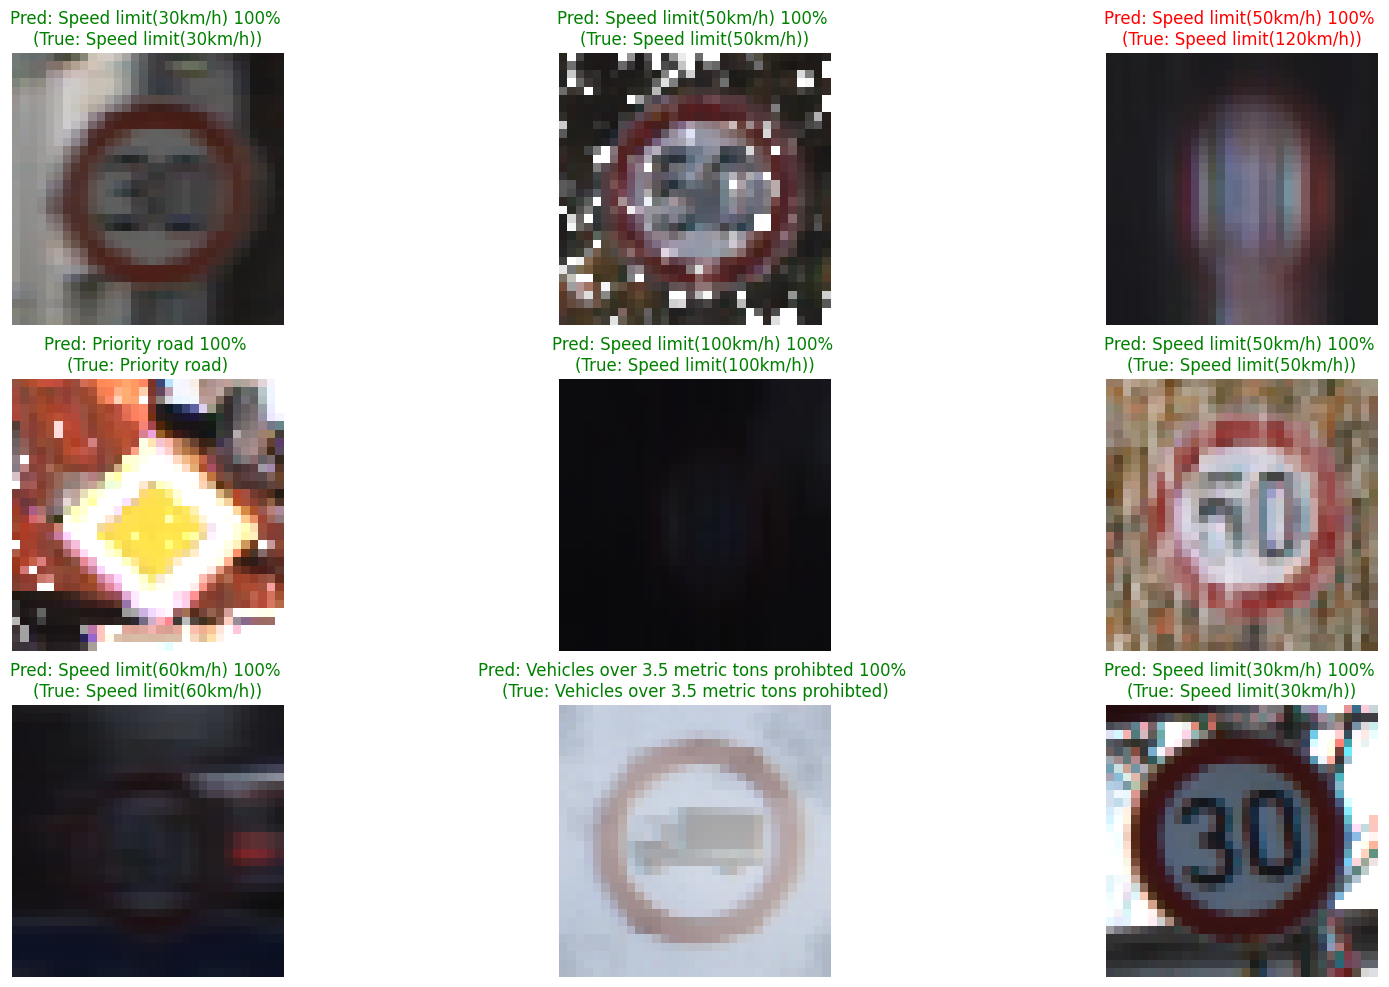

In [ ]:
#Choose Model for y_pred
# Get 9 random numbers
rand_img = random.sample(range(len(X_test)), 9)

# Get the predicted labels for the test data
y_pred = model3.predict(X_test)

# Plot the images and the predicted labels
fig, axs = plt.subplots(3, 3, figsize=(20, 12))
axs = axs.ravel()
for i in range(9):
  # Plot the image
  axs[i].imshow(X_test[rand_img[i]], cmap=plt.cm.binary)

  # Get the predicted and actual label indices
  pred_label = np.argmax(y_pred[rand_img[i]])
  true_label = np.argmax(y_test[rand_img[i]])

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
     color = "green"
  else:
     color = "red"

  # Set the label text
  axs[i].set_title("Pred: {} {:2.0f}% \n(True: {})".format(labels[pred_label],
                                                   100*tf.reduce_max(y_pred),
                                                   labels[true_label]),
             color=color) # set the color to green or red
  axs[i].axis('off')
plt.show()